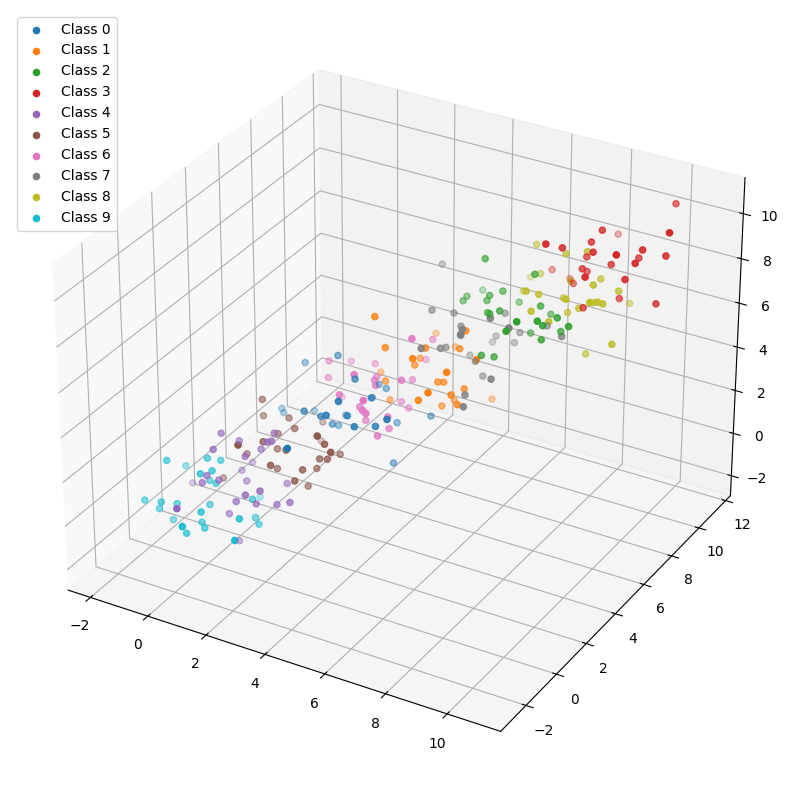

Final Accuracy for relu_adam_L2_N8: 0.45500001311302185
8/8 [==============================] - 0s 857us/step
Classification results saved to: C:\Users\Daniel\Desktop\screen\5Metod aktuwacji\result_relu_adam_2_8_acc0.45500001311302185_0.png
Training results saved to: C:\Users\Daniel\Desktop\screen\5Metod aktuwacji\training_results_result_relu_adam_2_8_acc0.45500001311302185_0.png
Final Accuracy for relu_adadelta_L2_N8: 0.125
8/8 [==============================] - 0s 857us/step
Classification results saved to: C:\Users\Daniel\Desktop\screen\5Metod aktuwacji\result_relu_adadelta_2_8_acc0.125_0.png
Training results saved to: C:\Users\Daniel\Desktop\screen\5Metod aktuwacji\training_results_result_relu_adadelta_2_8_acc0.125_0.png
Final Accuracy for relu_adagrad_L2_N8: 0.14499999582767487
8/8 [==============================] - 0s 1000us/step
Classification results saved to: C:\Users\Daniel\Desktop\screen\5Metod aktuwacji\result_relu_adagrad_2_8_acc0.14499999582767487_0.png
Training results sa

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, Adadelta, Adagrad, Nadam, SGD

# Generate 3-dimensional dataset with 10 classes and 250 elements
def generate_dataset():
    X = []
    y = []
    means = [[3, 3, 3], [5, 5, 5], [7, 7, 7], [9, 9, 9], [1, 1, 1], [2, 2, 2], [4, 4, 4], [6, 6, 6], [8, 8, 8], [0, 0, 0]]
    covs = [[[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]]]
    for i in range(10):
        X_class = np.random.multivariate_normal(means[i], covs[i], 25)
        X.extend(X_class)
        y.extend([i] * 25)
    return np.array(X), np.array(y)

# Plot the dataset
def plot_dataset(X, y):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(10):
        X_class = X[y == i]
        ax.scatter(X_class[:, 0], X_class[:, 1], X_class[:, 2], label='Class {}'.format(i))
    ax.legend()
    plt.show()

# Keras model class
class Classifier:
    def __init__(self, num_layers, neurons_per_layer, activation):
        self.num_layers = num_layers
        self.neurons_per_layer = neurons_per_layer
        self.activation = activation

    def build_model(self, input_shape):
        model = Sequential()
        model.add(Dense(self.neurons_per_layer, activation=self.activation, input_shape=(input_shape,)))
        for i in range(self.num_layers - 1):
            model.add(Dense(self.neurons_per_layer, activation=self.activation))
        model.add(Dense(10, activation='softmax'))
        return model

# Train the model
def train(X, y, model, optimizer, epochs):
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X, y, validation_split=0.2, epochs=epochs, verbose=0)
    return history

def plot_history(history, X, save_to_folder=None, prefix='', index=0, optimizer_name='', num_layers=0, neurons_per_layer=0, file_name=''):
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    if save_to_folder:
        history_results_path = os.path.join(save_to_folder, f"{prefix}training_results_{file_name}_{index}.png")
        plt.savefig(history_results_path)
        print(f"Training results saved to: {history_results_path}")
        plt.close()  # Close the figure after saving
    else:
        plt.show()

def plot_classification_results(X, y, model, save_to_folder=None, prefix='', index=0, optimizer_name='', num_layers=0, neurons_per_layer=0, file_name=''):
    y_probs = model.predict(X)
    y_pred = np.argmax(y_probs, axis=1)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(5):
        X_class = X[y == i]
        y_pred_class = y_pred[y == i]
        X_class_3d = np.column_stack((X_class, np.zeros(len(X_class))))
        ax.scatter(X_class_3d[:, 0], X_class_3d[:, 1], X_class_3d[:, 2], c=y_pred_class, label='Class {}'.format(i))
    ax.legend()
    if save_to_folder:
        classification_results_path = os.path.join(save_to_folder, f"{prefix}{file_name}_{index}.png")
        plt.savefig(classification_results_path)
        print(f"Classification results saved to: {classification_results_path}")
        plt.close()  # Close the figure after saving
    else:
        plt.show()

# Experiment function
def experiment(neurons_list=[8, 16, 32], num_layers_list=[2, 3, 4, 5], activations=['relu', 'sigmoid', 'tanh', 'linear', 'softmax'], optimizers=['adam', 'adadelta', 'adagrad', 'nadam', 'sgd'], epochs=100, save_screenshots=True, prefix=''):
    best_accuracy = 0.0
    best_model = None
    best_configuration = None
    screenshots_folder = 'C:\\Users\\Daniel\\Desktop\\screen\\5Metod aktuwacji'  # Enter your own path to the folder

    X, y = generate_dataset()
    plot_dataset(X, y)

    for num_layers in num_layers_list:
        for neurons_per_layer in neurons_list:
            for activation in activations:
                for optimizer_name in optimizers:
                    classifier = Classifier(num_layers, neurons_per_layer, activation=activation)
                    model = classifier.build_model(input_shape=3)

                    # Set optimizer from the list
                    if optimizer_name == 'adam':
                        optimizer = Adam()  # Use Adam instead of legacy.Adam
                    elif optimizer_name == 'adadelta':
                        optimizer = Adadelta()
                    elif optimizer_name == 'adagrad':
                        optimizer = Adagrad()
                    elif optimizer_name == 'nadam':
                        optimizer = Nadam()
                    elif optimizer_name == 'sgd':
                        optimizer = SGD()

                    history = train(X, y, model, optimizer, epochs)

                    # Display final accuracy for the current configuration
                    final_accuracy = history.history['accuracy'][-1]
                    print(f"Final Accuracy for {activation}_{optimizer_name}_L{num_layers}_N{neurons_per_layer}: {final_accuracy}")

                    # Check if the current configuration is the best
                    if final_accuracy > best_accuracy:
                        best_accuracy = final_accuracy
                        best_model = model
                        best_configuration = {
                            'num_layers': num_layers,
                            'neurons_per_layer': neurons_per_layer,
                            'activation': activation,
                            'optimizer': optimizer_name
                        }

                    # Plot and save the classification results
                    plot_classification_results(X, y, model, save_to_folder=screenshots_folder, prefix=prefix, index=0,
                                                optimizer_name=optimizer_name, num_layers=num_layers,
                                                neurons_per_layer=neurons_per_layer, file_name=f"result_{activation}_{optimizer_name}_{num_layers}_{neurons_per_layer}_acc{final_accuracy}")

                    # Plot and save the training results
                    plot_history(history, X, save_to_folder=screenshots_folder, prefix=prefix, index=0,
                                 optimizer_name=optimizer_name, num_layers=num_layers, neurons_per_layer=neurons_per_layer, file_name=f"result_{activation}_{optimizer_name}_{num_layers}_{neurons_per_layer}_acc{final_accuracy}")

    return best_accuracy, best_configuration

# Example usage
best_accuracy, best_configuration = experiment(save_screenshots=True, prefix='')
print(f"Best Accuracy: {best_accuracy}")
print("Best Configuration:", best_configuration)
